# Imports

In [1]:
import matplotlib.pyplot as plt
import os
from model import ConvNet
from dataset import Cats

# Data

In [4]:
root = "data/all_cats"
cats = Cats(all_cats_folder=root, test_csv="data/seed/test_iter_0.csv", train_csv="data/seed/train_iter_0.csv")

## Cats classes and labels

### Classes

In [5]:
cats.cls

{'red': 0,
 'white': 1,
 'black': 2,
 'grey': 3,
 'grey_brown_stripes': 4,
 'white_red': 5,
 'white_black_white_grey': 6,
 'three_colors': 7,
 'siam': 8}

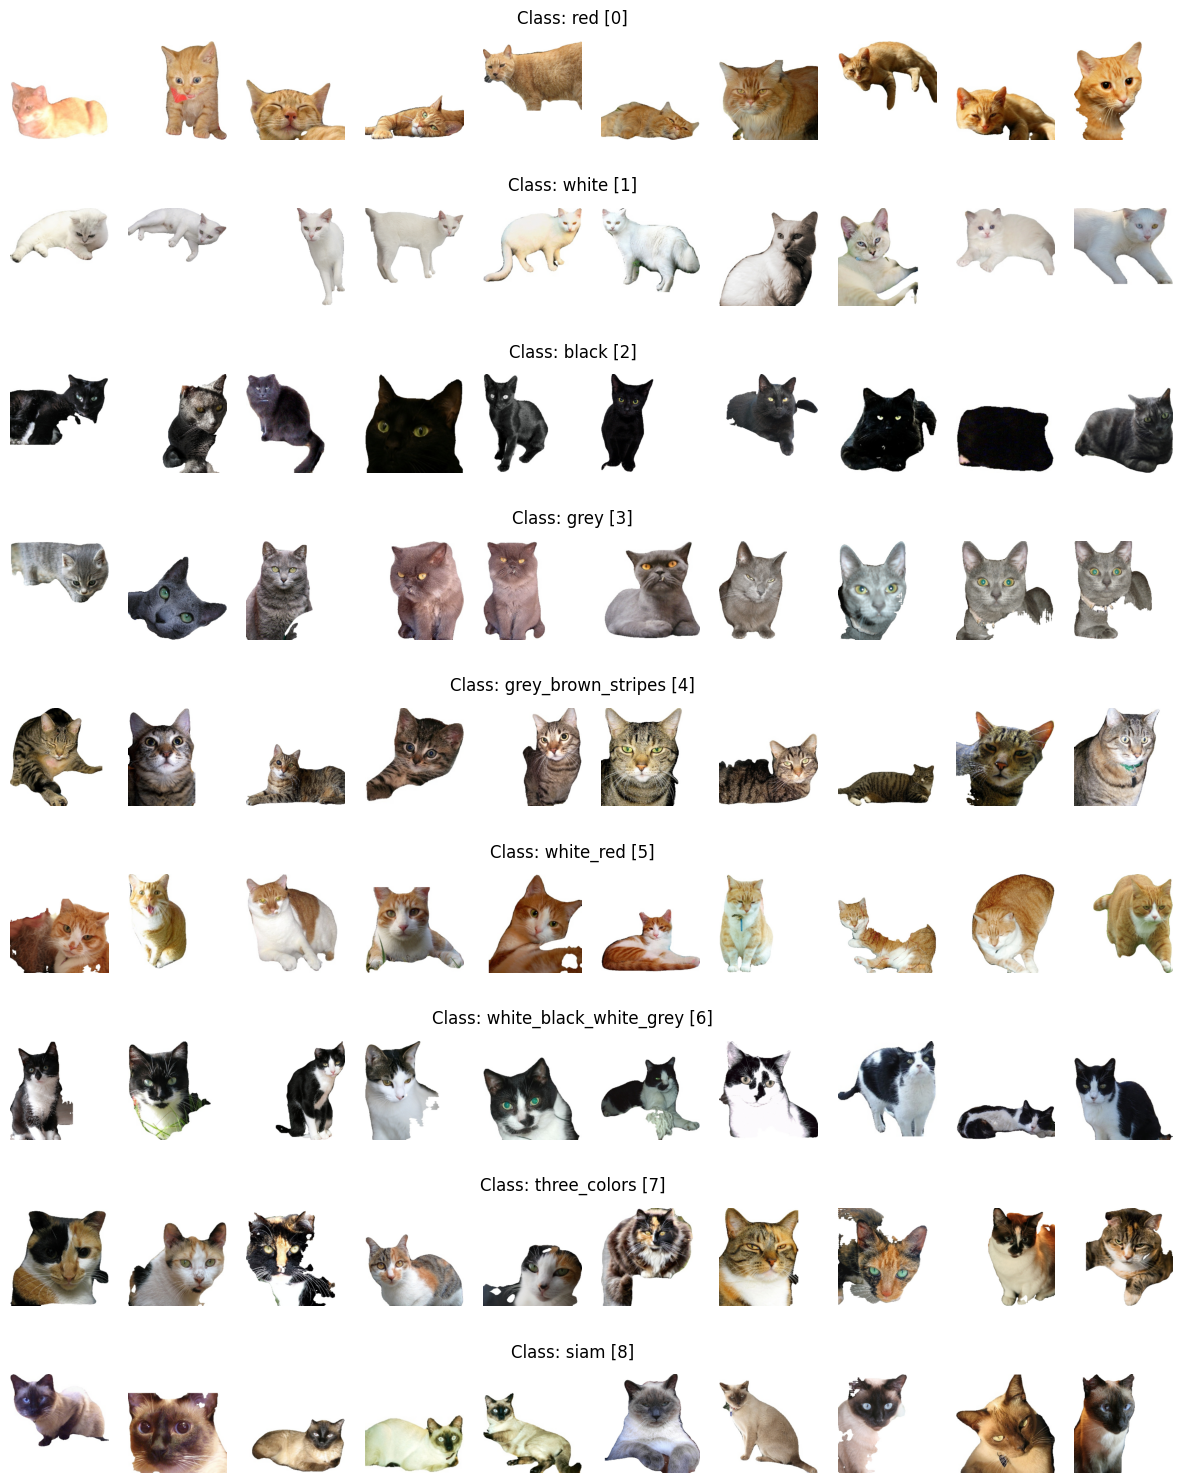

In [6]:
num_cls = len(cats.cls)
show_img_per_class = 10

fig = plt.figure(figsize=(15, 15))
subfigs = fig.subfigures(nrows=num_cls, ncols=1)

for idx, subfig in enumerate(subfigs):
    kind = list(cats.cls.keys())[idx]
    subfig.suptitle(f'Class: {list(cats.cls.keys())[idx]} [{cats.cls[kind]}]')
    cls_df = cats.train_cats[cats.train_cats["label"] == cats.cls[kind]].iloc[:show_img_per_class]
        
    axs = subfig.subplots(nrows=1, ncols=show_img_per_class)
    for col, ax in enumerate(axs):
        img = plt.imread(os.path.join(root, cls_df.index[col]))
        ax.imshow(img)
        ax.axis("off")

# Model overview

In [7]:
# Simple Convoulutional
model = ConvNet(num_classes=len(cats.cls))
model

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 2), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32, 

# Results

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


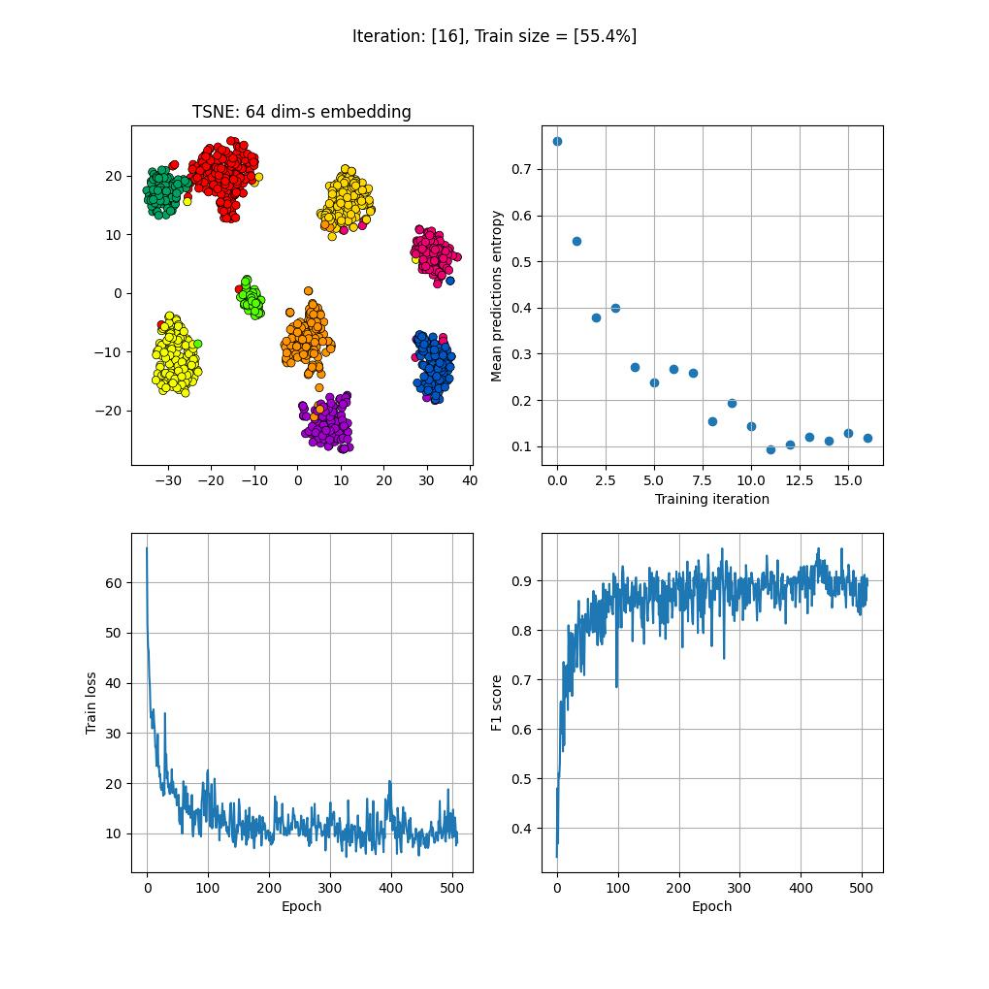

In [9]:
import matplotlib.animation as animation
from IPython.display import HTML
from IPython import display

fig = plt.figure(figsize=(10,10))
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout()

root_summary = "data/output"
base_name_summary = "embedding_entropy_iter_"
imgs_anim = []
img_names = []

for img_name in os.listdir(root_summary):
    if img_name.startswith(base_name_summary):
        img_names.append(img_name[:])

img_names.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

for img_name in img_names:
    img = plt.imread(os.path.join(root_summary, img_name))
    imgs_anim.append([plt.imshow(img, animated=True, aspect='auto')])
    
anim = animation.ArtistAnimation(fig, imgs_anim, interval=1000, repeat_delay=1000, blit=True)
HTML(anim.to_jshtml())
anim.save(os.path.join(root_summary, "results_tsne_loss_entropy.gif"))
anim.save(os.path.join("assets", "results_tsne_loss_entropy.gif"))